In [1]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Membaca Dataset

In [3]:
dataShopee = pd.read_csv('/content/Ulasan Shopee 5000 Data.csv')
dataShopee.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,17ea7fe4-2be8-4a99-91db-fe6b41c03194,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya gak suka sama kebijakan shopee sekarang s...,1,23,3.32.20,2024-08-21 15:28:34,"Hi kak, mf udh bkin ga nyman🙏. trkait ubah jas...",2024-08-21 16:58:44,3.32.20
1,2ee535ce-a832-4cdc-bc56-4a2ff7d30db0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,112,3.32.20,2024-08-21 01:28:13,"Hi kak, terima kasih ya untuk feedbacknya. Ked...",2024-08-21 02:28:53,3.32.20
2,931fc49e-cd81-484e-a296-3ebc49acb1ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,7,3.32.20,2024-08-22 06:09:59,"Hi kak, maaf atas kendala aplikasinya. Mimin s...",2024-08-22 07:45:57,3.32.20
3,7c2776a7-a710-43aa-b329-fcd83124ecc7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,49,3.32.20,2024-08-20 07:16:42,"Hai kak, maaf ya udah buat km ngga nyaman meng...",2024-08-20 08:26:59,3.32.20
4,425dba70-2048-4d14-ba9d-6b8e97005e13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin kesini makin kesana Knapa setiap kali ma...,3,3,3.32.20,2024-08-22 02:35:18,"Hai kak maaf ya atas kendalanya, trkait ingin ...",2024-08-22 03:39:46,3.32.20


#**Data Exploration**

Tujuan dari Data Exploration (Eksplorasi Data) yaitu untuk memahami dataset secara menyeluruh sebelum melakukan analisis lebih lanjut, pemodelan atau pembuatan prediksi.

In [4]:
dataShopee.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

In [5]:
# menampilkan ringkasan dataset yang berisi jumlah baris dan tipe data
info = dataShopee.info()
print('Ringkasan informasi:', info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  5000 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          4479 non-null   object
 9   repliedAt             4479 non-null   object
 10  appVersion            5000 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB
Ringkasan informasi: None


In [6]:
# menghitung dan menampilkan missing values
print('Jumlah missing values disetiap kolom:\n', dataShopee.isnull().sum())

Jumlah missing values disetiap kolom:
 reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion      0
at                        0
replyContent            521
repliedAt               521
appVersion                0
dtype: int64


Ada 2 kolom yang mempunyai banyak missing values berjumlah 1000, yaitu replyContent dan repliedAt. Kolom replyContent dan repliedAt tidak dilakukan pengisian nilai karena berisi balasan ulasan yang diberikan oleh pihak Shopee terhadap ulasan pengguna dan tanggal balasannya.

In [7]:
# menghapus kolom replyContent, repliedAt, dan reviewCreatedVersion yang berisi missing values
dataShopee = dataShopee.drop(['replyContent','repliedAt'], axis=1)
dataShopee.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,17ea7fe4-2be8-4a99-91db-fe6b41c03194,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya gak suka sama kebijakan shopee sekarang s...,1,23,3.32.20,2024-08-21 15:28:34,3.32.20
1,2ee535ce-a832-4cdc-bc56-4a2ff7d30db0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,112,3.32.20,2024-08-21 01:28:13,3.32.20
2,931fc49e-cd81-484e-a296-3ebc49acb1ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,7,3.32.20,2024-08-22 06:09:59,3.32.20
3,7c2776a7-a710-43aa-b329-fcd83124ecc7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,49,3.32.20,2024-08-20 07:16:42,3.32.20
4,425dba70-2048-4d14-ba9d-6b8e97005e13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin kesini makin kesana Knapa setiap kali ma...,3,3,3.32.20,2024-08-22 02:35:18,3.32.20


In [8]:
# mengganti nama kolom tanggal
dataShopee.rename(columns={'at':'date'},inplace=True)
print('mengecek nama kolom yang sudah diganti:', dataShopee.columns)

mengecek nama kolom yang sudah diganti: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'date', 'appVersion'],
      dtype='object')


In [9]:
# memisahkan tanggal yang terletak di timestamps
dataShopee['date'] = pd.to_datetime(dataShopee['date']).dt.date
dataShopee.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,date,appVersion
0,17ea7fe4-2be8-4a99-91db-fe6b41c03194,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya gak suka sama kebijakan shopee sekarang s...,1,23,3.32.20,2024-08-21,3.32.20
1,2ee535ce-a832-4cdc-bc56-4a2ff7d30db0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,112,3.32.20,2024-08-21,3.32.20
2,931fc49e-cd81-484e-a296-3ebc49acb1ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,7,3.32.20,2024-08-22,3.32.20
3,7c2776a7-a710-43aa-b329-fcd83124ecc7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,49,3.32.20,2024-08-20,3.32.20
4,425dba70-2048-4d14-ba9d-6b8e97005e13,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin kesini makin kesana Knapa setiap kali ma...,3,3,3.32.20,2024-08-22,3.32.20


In [10]:
# memisahkan tahun dan bulan
dataShopee['year'] = pd.to_datetime(dataShopee['date']).dt.year
dataShopee['month'] = pd.to_datetime(dataShopee['date']).dt.month

In [11]:
# Periksa nama kolom yang tersedia
print(dataShopee.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'date', 'appVersion', 'year',
       'month'],
      dtype='object')


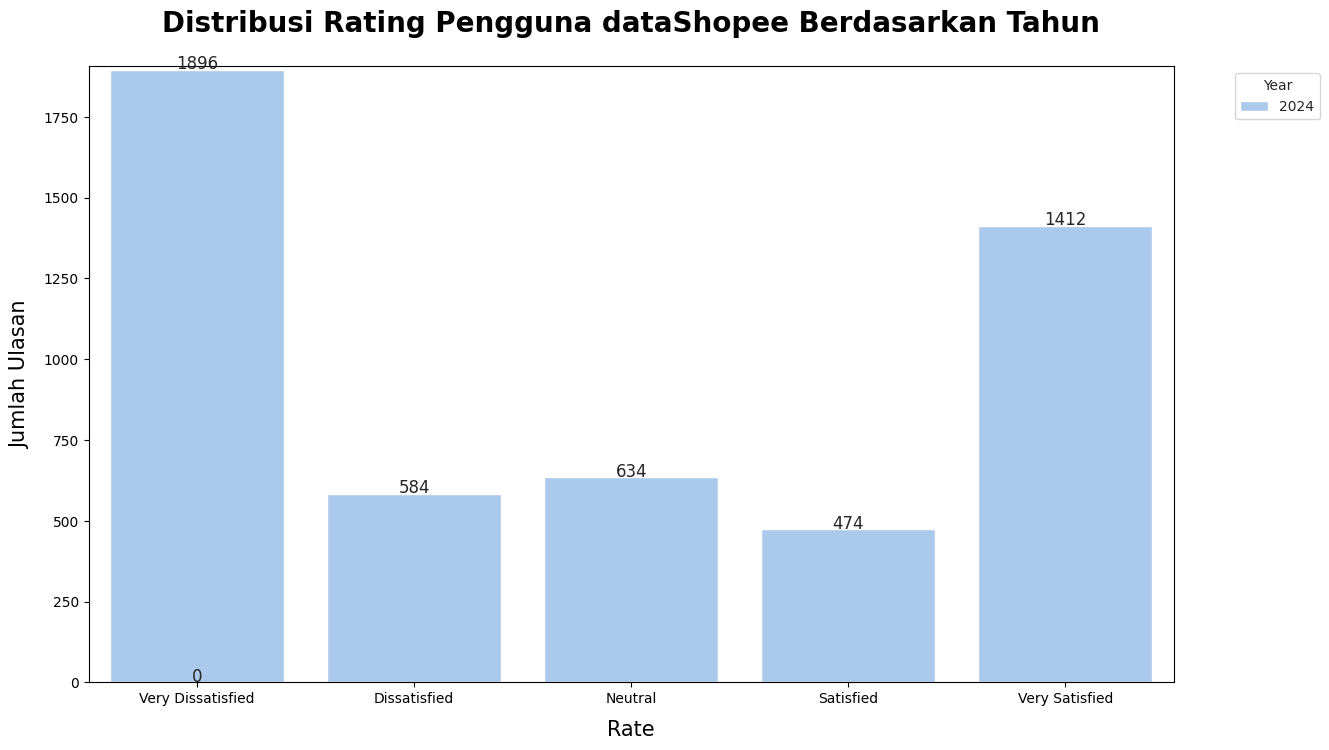

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.set_style('whitegrid')

# Menggunakan nama kolom yang benar untuk visualisasi
ax = sns.countplot(x="score", hue="year", data=dataShopee, palette="pastel")

# Menambahkan label hitungan pada setiap bar (dipecah berdasarkan tahun)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height:.0f}',
            ha="center", fontsize=12)

# Menetapkan judul dan label sumbu
plt.title('Distribusi Rating Pengguna dataShopee Berdasarkan Tahun', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.ylabel('Jumlah Ulasan', fontsize=15, labelpad=10)

plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Very Dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very Satisfied"])

plt.ylim(0, dataShopee['score'].value_counts().max() + 10)

plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

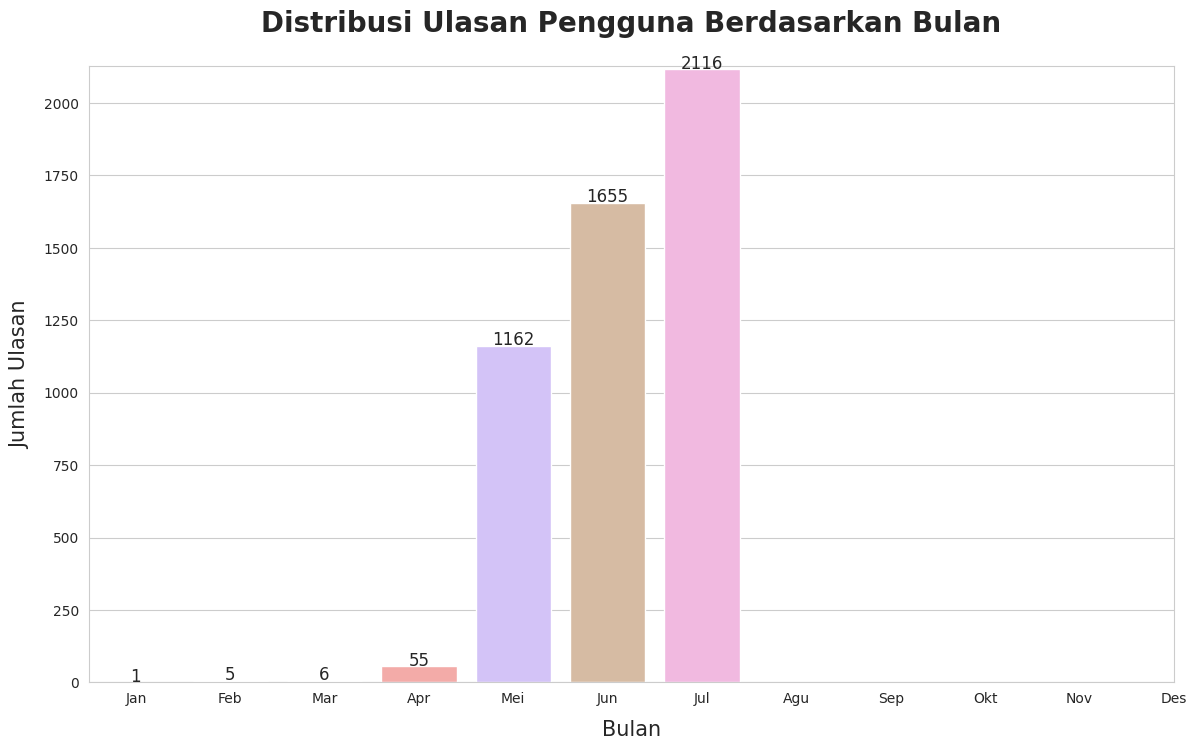

In [13]:
# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(14, 8))

# Mengatur style untuk seaborn
sns.set_style('whitegrid')

# Membuat bar chart untuk distribusi berdasarkan bulan dengan hue yang sama dengan x
ax = sns.countplot(x="month", hue="month", data=dataShopee, palette="pastel", legend=False)

# Menambahkan label hitungan pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height:.0f}',
            ha="center", fontsize=12)

# Menetapkan judul dan label sumbu
plt.title('Distribusi Ulasan Pengguna Berdasarkan Bulan', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Bulan', fontsize=15, labelpad=10)
plt.ylabel('Jumlah Ulasan', fontsize=15, labelpad=10)

# Menetapkan label untuk setiap bulan pada sumbu-x
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])

# Menyesuaikan batas sumbu-y untuk estetika
plt.ylim(0, dataShopee['month'].value_counts().max() + 10)

# Menampilkan plot
plt.show()

In [14]:
print(dataShopee.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'date', 'appVersion', 'year',
       'month'],
      dtype='object')


In [15]:
dataShopee.drop(['reviewId','userName','userImage','thumbsUpCount','date','year','month','reviewCreatedVersion','appVersion'], axis=1, inplace=True)
dataShopee.head()

,content,score
0,saya gak suka sama kebijakan shopee sekarang s...,1
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3
4,Makin kesini makin kesana Knapa setiap kali ma...,3


# Check Duplicate Data that contain in the content column

In [16]:
# menghitung jumlah ulasan yang duplikasi
dataShopee.duplicated().sum()

0

Ulasan sudah bersih dari duplikasi dan siap untuk melanjutkan proses, yaitu persiapan data untuk membersihkan ulasan dari emoji, tanda baca, ketidakserasian jenis huruf, pengulangan kata, normalisasi, dll

# PRE-PROCESSING

1. Case Folding : Proses mengubah semua huruf dalam teks menjadi huruf kecil atau huruf besar agar konsisten.
2. Removal Special Characters : Proses menghapus karakter khusus atau simbol yang tidak relevan atau tidak diinginkan dari teks.
3. Stopword Removal (Filtering): Proses menghapus kata-kata yang umumnya tidak memberikan nilai tambah dalam analisis teks, seperti "dan", "atau", "yang", dll.
4. Tokenizing : Proses membagi teks menjadi bagian-bagian lebih kecil yang disebut token.
5. Stemming : Proses menghapus imbuhan dari kata untuk mengembalikannya ke bentuk dasarnya.


Case Folding

In [17]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

dataShopee['clean_review'] = dataShopee['content'].apply(lambda low:lowercase(str(low)))
dataShopee.head()

,content,score,clean_review
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya gak suka sama kebijakan shopee sekarang s...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,"pelayanan penjualnya rerata ramah dan baik, ta..."
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasinya bagus..cuma agak berat..kalo pas b...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana knapa setiap kali ma...


Removal Special Characters

In [18]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji
def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

dataShopee['clean_review'] = dataShopee['clean_review'].apply(lambda emoji: remove_emoji(emoji))
dataShopee.head()

,content,score,clean_review
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya gak suka sama kebijakan shopee sekarang s...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,"pelayanan penjualnya rerata ramah dan baik, ta..."
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasinya bagus..cuma agak berat..kalo pas b...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana knapa setiap kali ma...


In [19]:
# menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

dataShopee['clean_review'] = dataShopee['clean_review'].apply(lambda punct: remove_punctuation(punct))
dataShopee.head()

,content,score,clean_review
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya gak suka sama kebijakan shopee sekarang s...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasinya bagus cuma agak berat kalo pas buk...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana knapa setiap kali ma...


In [20]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

dataShopee['clean_review'] = dataShopee['clean_review'].apply(lambda num: remove_superscript(num))
dataShopee.head()

,content,score,clean_review
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya gak suka sama kebijakan shopee sekarang s...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasinya bagus cuma agak berat kalo pas buk...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana knapa setiap kali ma...


In [21]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

dataShopee['clean_review'] = dataShopee['clean_review'].apply(lambda word: word_repetition(word))
dataShopee.head()

,content,score,clean_review
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya gak suka sama kebijakan shopee sekarang s...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasinya bagus cuma agak berat kalo pas buk...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana knapa setiap kali ma...


In [22]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti main main -> main

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

dataShopee['clean_review'] = dataShopee['clean_review'].apply(lambda word: repetition(word))
dataShopee.head()

,content,score,clean_review
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya gak suka sama kebijakan shopee sekarang s...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasinya bagus cuma agak berat kalo pas buk...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana knapa setiap kali ma...


In [23]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

dataShopee['clean_review'] = dataShopee['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

dataShopee['clean_review'] = dataShopee['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))
dataShopee.head()

,content,score,clean_review
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya gak suka sama kebijakan shopee sekarang s...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasinya bagus cuma agak berat kalo pas buk...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana knapa setiap kali ma...


Ulasan pengguna tidak hanya berisi kata yang bisa ditafsirkan atau dimengerti oleh manusia. Ada kalanya pengguna memberikan informasi berupa kode voucher, ketawa, atau kata abstrak yang tidak bisa/sulit diterjemahkan. Dimana kata tersebut bisa membingungkan orang yang menganalisisnya karena tidak tahu arti dari kata tersebut. Maka dari itu, saya melakukan pembersihan secara mendalam dengan menghapus seluruh kata abstrak yang nantinya tidak memberikan informasi apapun kepada model dan hanya menghambat kinerja model.

In [24]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar',
         'syantienurxdataShopee', 'ghinaxdataShopee', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

dataShopee['clean_review'] = dataShopee['clean_review'].apply(lambda banned:RemoveBannedWords(banned))
dataShopee.head()

,content,score,clean_review
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya gak suka sama kebijakan shopee sekarang s...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasinya bagus cuma agak berat kalo pas buk...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana knapa setiap kali ma...


Normalization Phase

In [25]:
!gdown --id 1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y

slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y
To: /content/slang.txt
100% 32.8k/32.8k [00:00<00:00, 66.7MB/s]


In [26]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [27]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [28]:
clean_text = []
for review in dataShopee['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [29]:
clean_text

['saya tidak suka sama kebijakan shopee sekarang semua pengiriman dimasukan ke spx kalau mau mengubah dikenakan biaya yang begitu mahal asli kecewa sama diperbarui terbaru nya sekarang hampir 3th setia belanja dishope nyaman saja sekarang tidak nyaman sama expedisi yang di rekomendasi mana kemarin paket saya hilang pakai spx sudah lah hilang lama banget barang datangnya lebih suka pakai j t sudah terpecaya menurut saya pribadi yang suka mengunakan jasa j t ketimbang lainnya',
 'pelayanan penjualnya rerata ramah dan baik tapi yang buruk ekspedisi pengirimannya benar bisa diubah sebelum cek out barang itupun kalau kita sebagai pembeli paham ingat mengubah pengirimannya di samping itu ongkos kirimnya bisa jadi lebih mahal daripada barang yang mau dibeli minimal jujur saya jauh lebih suka aplikasi yang versi lama yang semahal mahalnya ongkos kirim masih di batas wajar kalau yang sekarang apalagi berdasarkan rek aplikasi harus banget ya pakai ekspedisi yang kualitasnya kureng begitu',
 'apl

In [30]:
dataShopee['clean_review'] = clean_text
dataShopee.head()

,content,score,clean_review
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya tidak suka sama kebijakan shopee sekarang...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasi nya bagus cuma agak berat kalau pas b...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana kenapa setiap kali m...


Setelah melakukan analisis terhadap ulasan yang telah bersih, menghapus kata abstrak tidak cukup untuk membuat ulasan bersih karena masih ditemukan beberapa kata yang tidak sesuai dan membingungkan. Oleh karena itu, saya melakukan penghapusan kata yang terdiri dari 3 huruf, seperti oh, iya, ini, itu, dll, dan tidak memberikan informasi penting bagi model saat melakukan prediksi.

In [31]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [32]:
dataShopee['final_text'] = dataShopee['clean_review'].apply(lambda remove: remove_small_words(str(remove)))
dataShopee

,content,score,clean_review,final_text
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya tidak suka sama kebijakan shopee sekarang...,saya tidak suka sama kebijakan shopee sekarang...
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...,pelayanan penjualnya rerata ramah baik tapi y...
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasi nya bagus cuma agak berat kalau pas b...,aplikasi bagus cuma agak berat kalau buka pr...
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...,tidak pilihan lagi untuk memilih ekspedisi s...
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana kenapa setiap kali m...,makin kesini makin kesana kenapa setiap kali ...
...,...,...,...,...
4995,akuu suka banget pokok nyaa sukakkk bangettt b...,5,akuu suka banget pokok nyaa sukakk banget apli...,akuu suka banget pokok nyaa sukakk banget apli...
4996,Bagus. Jadi kita gx perlu ribet ribet cari tok...,5,bagus jadi kita tidak perlu rumit cari toko of...,bagus jadi kita tidak perlu rumit cari toko of...
4997,Belanja di shoppe sangat memuaskan karena barg...,5,belanja di shoppe sangat memuaskan karena barg...,belanja shoppe sangat memuaskan karena barg y...
4998,Sekarang shopee keren banyak diskonnya mudah-m...,5,sekarang shopee keren banyak diskonnya mudah m...,sekarang shopee keren banyak diskonnya mudah m...


Word Tokenizing

In [33]:
def word_token(review_text):
  return word_tokenize(review_text)

In [34]:
dataShopee['token'] = dataShopee['final_text'].apply(lambda tokenize:word_token(str(tokenize)))
dataShopee.head()

,content,score,clean_review,final_text,token
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya tidak suka sama kebijakan shopee sekarang...,saya tidak suka sama kebijakan shopee sekarang...,"[saya, tidak, suka, sama, kebijakan, shopee, s..."
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...,pelayanan penjualnya rerata ramah baik tapi y...,"[pelayanan, penjualnya, rerata, ramah, baik, t..."
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasi nya bagus cuma agak berat kalau pas b...,aplikasi bagus cuma agak berat kalau buka pr...,"[aplikasi, bagus, cuma, agak, berat, kalau, bu..."
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...,tidak pilihan lagi untuk memilih ekspedisi s...,"[tidak, pilihan, lagi, untuk, memilih, ekspedi..."
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana kenapa setiap kali m...,makin kesini makin kesana kenapa setiap kali ...,"[makin, kesini, makin, kesana, kenapa, setiap,..."


# Wordcloud Visualization

In [35]:
review_all = []

for review in dataShopee['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Streaming output truncated to the last 5000 lines.
bukan
saya
daftar
begini
saya
cuman
coba
saja
berarti
masih
peduli
laku
sudah
lima
tahunan
pakai
sophee
mungkin
toko
yang
selalu
dapat
rating
jelek
atau
penilaian
buruk
dari
pembeli
harus
diseleksi
lagi
keberadaannya
tapi
satu
sophee
keren
pilihan
produk
untuk
perbandingan
harga
tetap
mantap
barang
atau
produk
dengan
merek
yang
sama
bisa
hunting
sampai
ketemu
harga
yang
paling
murah
hanya
sophee
yang
seperti
tolong
ditambahkan
fitur
penghapusan
riwayat
pesanan
dong
biar
aplikasi
semakin
sempurna
aplikasi
sangat
berguna
barang
juga
bagus
semua
tapi
cuma
beberapa
yang
toko
tidak
jujur
tapi
menurut
saya
shopee
sudah
bagus
banget
masa
tidak
bisa
masukkan
nomor
whatsapp
padahal
sudah
benar
bahkan
tulis
nomor
tidak
tidak
bisa
buka
keranjang
katanya
jaringannya
jelek
padahal
bagus
saja
shopee
semakin
diperbarui
bahkan
jadi
berat
loading
berputar
putar
padahal
jaringan
sangat
baik
shopee
sangat
membantu
segalanya
dalam
keperluan
berbelanja
sem

In [36]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire shopee review")
freq_dist

how many frequency distribution samples from an entire shopee review


FreqDist({'tidak': 6174, 'yang': 4376, 'saya': 4184, 'shopee': 3792, 'bisa': 2886, 'sudah': 2770, 'aplikasi': 2298, 'barang': 1909, 'tapi': 1749, 'lagi': 1735, ...})

In [37]:
# menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('tidak', 6174), ('yang', 4376), ('saya', 4184), ('shopee', 3792), ('bisa', 2886), ('sudah', 2770), ('aplikasi', 2298), ('barang', 1909), ('tapi', 1749), ('lagi', 1735), ('saja', 1627), ('kalau', 1589), ('belanja', 1417), ('untuk', 1294), ('juga', 1273), ('sampai', 1188), ('sangat', 1160), ('sekarang', 1158), ('padahal', 1142), ('pakai', 1108), ('kirim', 1094), ('jadi', 1077), ('dari', 1073), ('tolong', 1056), ('banget', 1049), ('banyak', 1049), ('dengan', 1045), ('pengiriman', 1009), ('karena', 974), ('sama', 964), ('lebih', 911), ('bagus', 891), ('bahkan', 889), ('lama', 886), ('bayar', 869), ('terus', 788), ('ongkos', 770), ('kasih', 770), ('makin', 756), ('kenapa', 702), ('selalu', 692), ('buat', 679), ('lain', 663), ('hari', 643), ('kurir', 631), ('paket', 627), ('harus', 616), ('masih', 582), ('dahulu', 576), ('lambat', 575), ('terima', 572), ('pesanan', 555), ('diperbarui', 554), ('toko', 542), ('baru', 534), ('kecewa', 526), ('sesuai', 523), ('pesan', 521), ('suka', 515), ('be

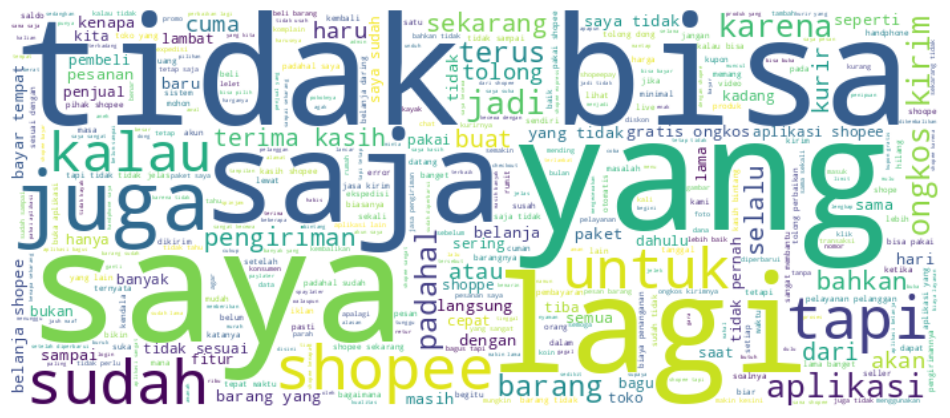

In [38]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,tidak,6174
1,yang,4376
2,saya,4184
3,shopee,3792
4,bisa,2886
...,...,...
495,asli,45
496,untung,45
497,ajukan,45
498,tentang,45


In [40]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

<ipython-input-41-01404f08f827>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')


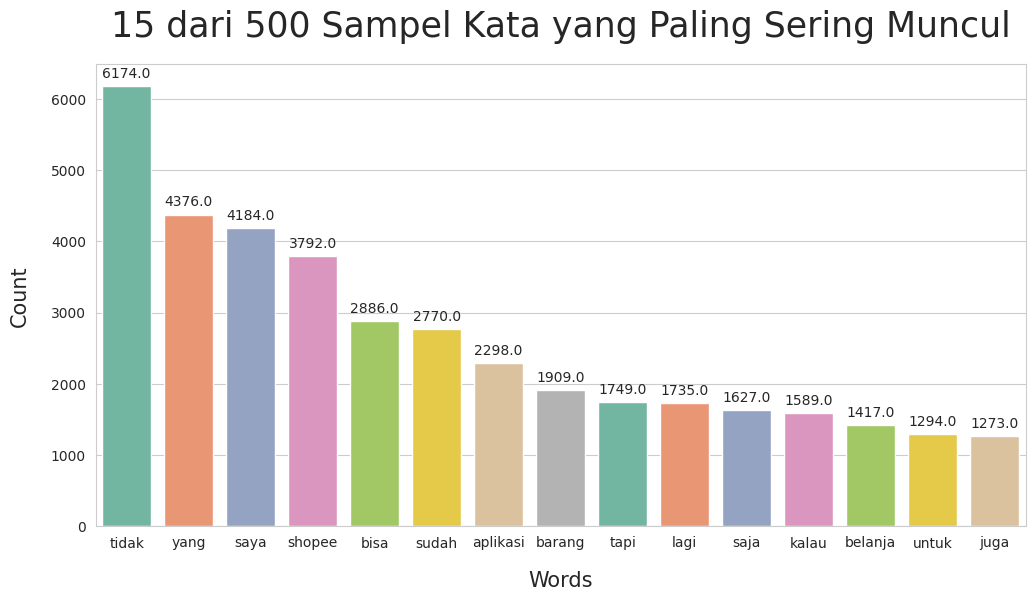

In [41]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

In [42]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
stop_words = stopwords.words('indonesian') + stopwords.words('english') + ["yg", "gak", "ngisi", "udah", "d", "sih", "nya", "srg", "utk", "byk", "gk", "ga", "aja", "tp", "udh"]
dataShopee['final_text'] = dataShopee['final_text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if (word.isalpha() and word.lower() not in stop_words)])

In [44]:
dataShopee['final_text'] = dataShopee['final_text'].apply(lambda x: ' '.join(x))
dataShopee.head()

,content,score,clean_review,final_text,token
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya tidak suka sama kebijakan shopee sekarang...,suka kebijakan shopee pengiriman dimasukan men...,"[saya, tidak, suka, sama, kebijakan, shopee, s..."
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...,pelayanan penjualnya rerata ramah buruk eksped...,"[pelayanan, penjualnya, rerata, ramah, baik, t..."
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasi nya bagus cuma agak berat kalau pas b...,aplikasi bagus berat buka produk menu sebelumy...,"[aplikasi, bagus, cuma, agak, berat, kalau, bu..."
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...,pilihan memilih ekspedisi shophee mengarahkan ...,"[tidak, pilihan, lagi, untuk, memilih, ekspedi..."
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana kenapa setiap kali m...,kesini kesana kali chekout klik gambar disuruh...,"[makin, kesini, makin, kesana, kenapa, setiap,..."


In [45]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [46]:
stemmer = StemmerFactory().create_stemmer()
dataShopee['final_text'] = dataShopee['final_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

dataShopee.head(5)

,content,score,clean_review,final_text,token
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya tidak suka sama kebijakan shopee sekarang...,suka bijak shopee kirim masuk ubah kena biaya ...,"[saya, tidak, suka, sama, kebijakan, shopee, s..."
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...,layan jual rerata ramah buruk ekspedisi kirim ...,"[pelayanan, penjualnya, rerata, ramah, baik, t..."
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasi nya bagus cuma agak berat kalau pas b...,aplikasi bagus berat buka produk menu sebelumy...,"[aplikasi, bagus, cuma, agak, berat, kalau, bu..."
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...,pilih pilih ekspedisi shophee arah ekspedisi j...,"[tidak, pilihan, lagi, untuk, memilih, ekspedi..."
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana kenapa setiap kali m...,kesini kesana kali chekout klik gambar suruh f...,"[makin, kesini, makin, kesana, kenapa, setiap,..."


# Data Labeling

Ulasan masih belum mempunyai sentimen sehingga sulit untuk mencari tahu apakah pengguna memberikan ulasan positif atau negatif. Proses pemberian sentimen tidak mungkin dilakukan secara manual dengan melihat ulasan secara satu per satu karena membutuhkan waktu yang lama dan memerlukan seorang ahli di bidang bahasa yang dapat menafsirkan ulasan kemudian mengelompokkan ke sentimen positif dan negatif. Maka dari itu, saya melakukan proses pemberian label sentimen dengan menerapkan metode yang berbasis lexicon atau biasa dikenal dengan lexicon-based method. Kamus yang digunakan adalah InSet Lexicon yang terdiri dari kamus positif dan negatif.

In [47]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [48]:
# labelling
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

additional_lexicon_id = {
    'kecewa': -0.4,
    'rugi': -1,
    'buruk': -0.6,
    'jelek': -0.6,
    'lelet': -0.7,
    'gagal': -0.5,
    'parah': -0.6,
    'mahal': -0.3,
    'tolong': -0.1,
    'hilang': -0.3,
    'gajelas': -0.3,
    'gj': -0.3,
    'promo': 0.6,
    'kadang': -0.1,
    'maling': -0.5,
    'ganggu': 0.3,
    'sedot': -0.5,
    'bagus': 0.5,
    'pulsa': 0,
    'potong': -1,
    'baik': 0.5,
    'kntl': -1,
    'ngelag': -0.8,
    'salah': -0.5,
    'bintang': 0,
    'benerin': -0.4,
    'lambat': -0.8,
    'siput': -0.4,
    'mati': -0.7,
    'minimal': -0.3,
    'susah': -0.6,
    'nagih': -0.6,
    'capek': -0.7,
    'kacau': -0.3,
    'tagih': -0.3,
    'mantap': 1,
    'puas': 0.9,
    'sampah': -0.5,
    'sulit': -0.6,
    'aneh': -0.4,
}

analyzer.lexicon.update(additional_lexicon_id)

dataShopee['sentimen'] = dataShopee['final_text'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

dataShopee

,content,score,clean_review,final_text,token,sentimen
0,saya gak suka sama kebijakan shopee sekarang s...,1,saya tidak suka sama kebijakan shopee sekarang...,suka bijak shopee kirim masuk ubah kena biaya ...,"[saya, tidak, suka, sama, kebijakan, shopee, s...",Negatif
1,"Pelayanan penjualnya rerata ramah dan baik, ta...",3,pelayanan penjualnya rerata ramah dan baik tap...,layan jual rerata ramah buruk ekspedisi kirim ...,"[pelayanan, penjualnya, rerata, ramah, baik, t...",Negatif
2,Aplikasinya bagus..cuma agak berat..kalo pas b...,3,aplikasi nya bagus cuma agak berat kalau pas b...,aplikasi bagus berat buka produk menu sebelumy...,"[aplikasi, bagus, cuma, agak, berat, kalau, bu...",Positif
3,Tidak ada pilihan lagi untuk memilih ekspedisi...,3,tidak ada pilihan lagi untuk memilih ekspedisi...,pilih pilih ekspedisi shophee arah ekspedisi j...,"[tidak, pilihan, lagi, untuk, memilih, ekspedi...",Negatif
4,Makin kesini makin kesana Knapa setiap kali ma...,3,makin kesini makin kesana kenapa setiap kali m...,kesini kesana kali chekout klik gambar suruh f...,"[makin, kesini, makin, kesana, kenapa, setiap,...",Positif
...,...,...,...,...,...,...
4995,akuu suka banget pokok nyaa sukakkk bangettt b...,5,akuu suka banget pokok nyaa sukakk banget apli...,akuu suka banget pokok nyaa sukakk banget apli...,"[akuu, suka, banget, pokok, nyaa, sukakk, bang...",Positif
4996,Bagus. Jadi kita gx perlu ribet ribet cari tok...,5,bagus jadi kita tidak perlu rumit cari toko of...,bagus rumit cari toko offline cari barang bara...,"[bagus, jadi, kita, tidak, perlu, rumit, cari,...",Netral
4997,Belanja di shoppe sangat memuaskan karena barg...,5,belanja di shoppe sangat memuaskan karena barg...,belanja shoppe muas barg kirim sesuai kirim on...,"[belanja, shoppe, sangat, memuaskan, karena, b...",Negatif
4998,Sekarang shopee keren banyak diskonnya mudah-m...,5,sekarang shopee keren banyak diskonnya mudah m...,shopee keren diskon mudah mudah tingkat diskon...,"[sekarang, shopee, keren, banyak, diskonnya, m...",Netral


# TF IDF

In [49]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(dataShopee['final_text'])

# Analisis Sentimen

In [50]:
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

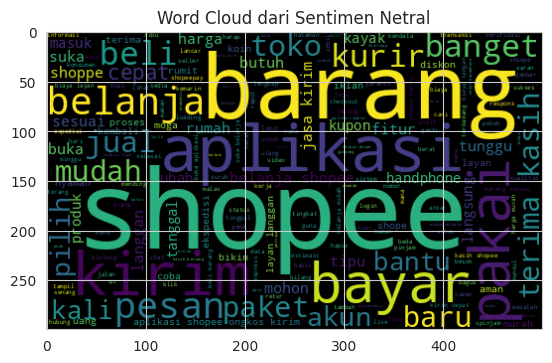

In [51]:
dataShopee_netral = dataShopee[dataShopee['sentimen'] == 'Netral']
all_words_netral = ' '.join([twts for twts in dataShopee_netral['final_text']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Netral')
plt.show()

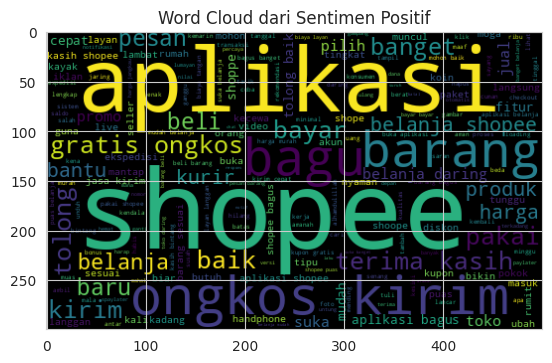

In [52]:
dataShopee_positif = dataShopee[dataShopee['sentimen'] == 'Positif']
all_words_positif = ' '.join([twts for twts in dataShopee_positif['final_text']])
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Positif')
plt.show()

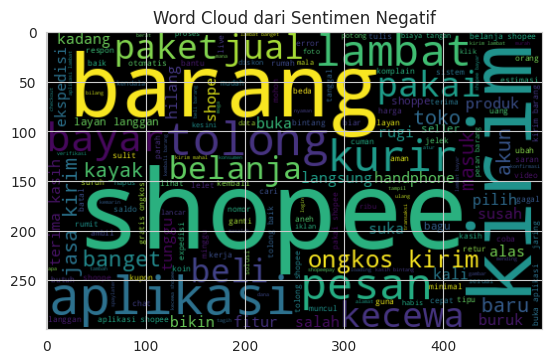

In [53]:
dataShopee_negatif = dataShopee[dataShopee['sentimen'] == 'Negatif']
all_words_negatif = ' '.join([twts for twts in dataShopee_negatif['final_text']])
wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

plt.imshow(wordcloud_negatif, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()

In [54]:
temp = dataShopee.groupby('sentimen').count()['final_text'].reset_index().sort_values(by='final_text',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,sentimen,final_text
0,Negatif,2539
2,Positif,1470
1,Netral,991


<Axes: xlabel='sentimen', ylabel='count'>

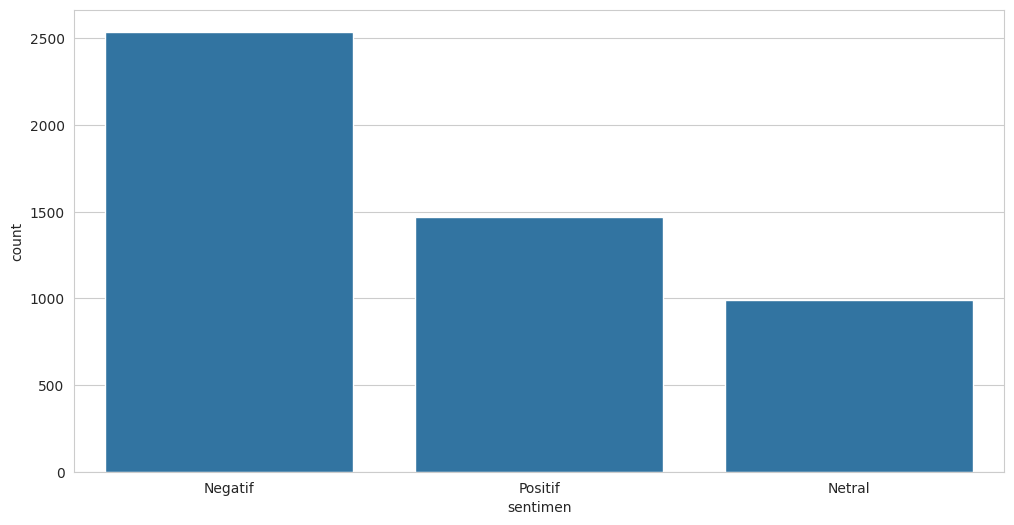

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentimen',data=dataShopee)

In [56]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentimen,
    values = temp.final_text,
    title = {"position": "top center", "text": "Funnel-Chart dari Distribusi target"}
    ))
fig.show()

In [57]:
!pip install palettable
from palettable.colorbrewer.qualitative import Pastel1_7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 4.7 MB/s eta 0:00:00


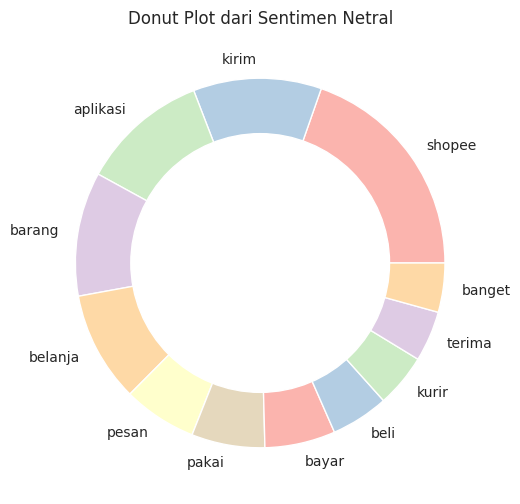

In [58]:
unique_netral_words = dataShopee_netral['final_text'].str.split(expand=True).stack().value_counts().reset_index()
unique_netral_words.columns = ['words', 'count']
top_20_words = unique_netral_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen Netral')
plt.show()

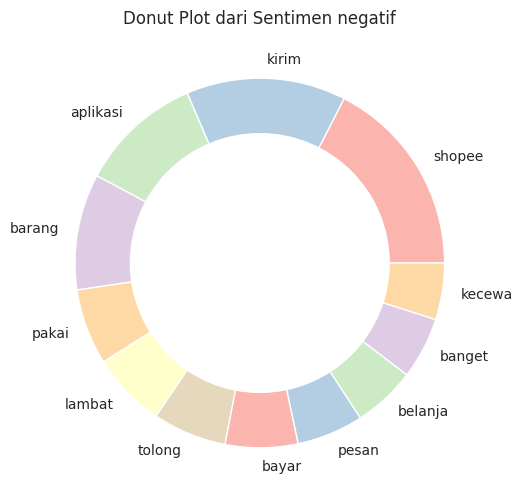

In [59]:
unique_negatif_words = dataShopee_negatif['final_text'].str.split(expand=True).stack().value_counts().reset_index()
unique_negatif_words.columns = ['words', 'count']
top_20_words = unique_negatif_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen negatif')
plt.show()

In [60]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, dataShopee['sentimen'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4000, 6518), (1000, 6518))

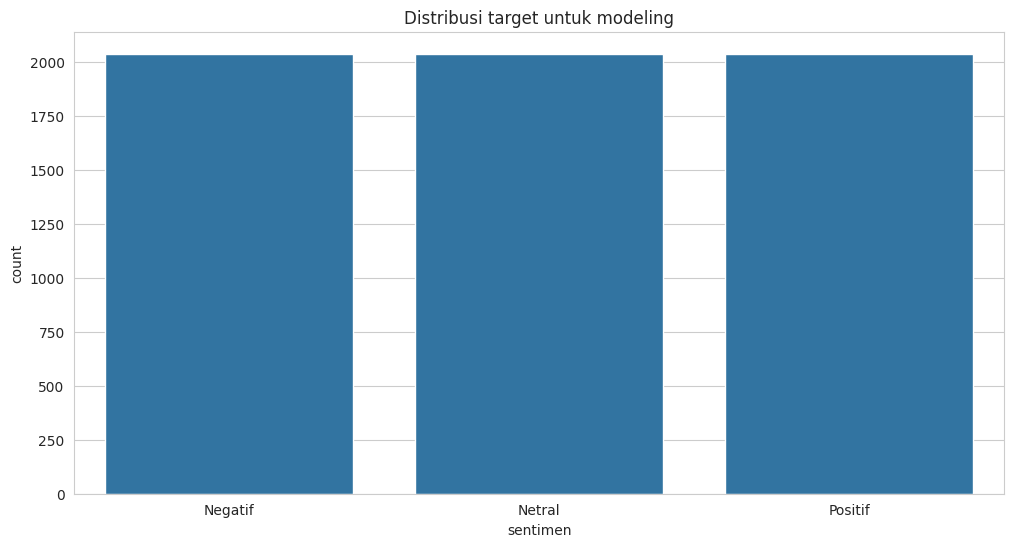

In [61]:
#Resampling target
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

MODELING ALGORITMA RANDOM FOREST

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [63]:
# init parameters
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [67]:
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [68]:
# print best param
print("\nBest Parameters for Random Forest:", rf_model.best_params_)


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [70]:
# evaluasi model
y_pred_rf = rf_model.best_estimator_.predict(X_test)

print("\n\nClassification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))



Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

     Negatif       0.91      0.93      0.92       499
      Netral       0.84      0.89      0.86       194
     Positif       0.90      0.84      0.87       307

    accuracy                           0.89      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000

